In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from datetime import datetime
from unidecode import unidecode

In [2]:
funias_sabana=pd.read_excel(r"C:\Users\Andres\Downloads\funias_ajustado.xlsx")

In [3]:
funias_sabana.columns

Index(['CONSECUTIVO PUNTO', 'NOMBRE DEL PROYECTO', 'MUNICIPIO',
       'CUENCA HIDROGRÁFICA', 'NORTE', 'ESTE', 'NIVEL ESTATICO',
       'ESTRUCTURA GEOLOGICA', 'UNIDAD GEOLOGICA', 'NIVEL_ESTATICO_12_1998',
       'NIVEL_ESTATICO_02_1999', 'NIVEL_ESTATICO_12_2000',
       'NIVEL_ESTATICO_02_2001', 'NIVEL_ESTATICO_01_2002',
       'NIVEL_ESTATICO_07_2002', 'NIVEL_ESTATICO_07_2003',
       'NIVEL_ESTATICO_12_2005', 'NIVEL_ESTATICO_01_2006',
       'NIVEL_ESTATICO_2008', 'NIVEL_ESTATICO_2009', 'NIVEL_ESTATICO_2011',
       'NIVEL_ESTATICO_2012', 'NIVEL_ESTATICO_2015', 'NIVEL_ESTATICO_2017',
       'NIVEL_ESTATICO_2020', 'NIVEL_ESTATICO_2022', 'NIVEL_ESTATICO_2023',
       'NIVEL_ESTATICO_2025', 'Municipio_normalizado'],
      dtype='object')

In [4]:
funias_sabana.drop(columns=["Municipio_normalizado"],inplace=True)

In [5]:
funias_sabana.MUNICIPIO.unique()

array(['Chocontá', 'Sesquile', 'Tocancipá', 'Gachancipá', 'TOCANCIPÁ',
       'Suesca', 'Sopó', 'La Calera', 'Nemocon', 'Cogua', 'Chía',
       'Cajicá', 'Nemocón', 'Cota', 'Funza', 'Soacha', 'Bogotá', 'Tenjo',
       'Tabio', 'Mosquera', 'Madrid', nan, 'El Rosal', 'Facatativa',
       'Subachoque', 'Bojacá', 'MADRID', 'SOACHA', 'Sibaté', 'Tenoj'],
      dtype=object)

In [6]:

funias_sabana['MUNICIPIO'] = funias_sabana['MUNICIPIO'].replace('Tenoj', 'Tenjo')

In [7]:
funias_sabana.MUNICIPIO.value_counts()

MUNICIPIO
Madrid        79
Tenjo         64
Facatativa    59
El Rosal      55
TOCANCIPÁ     35
Chía          28
Sopó          27
Funza         24
Nemocon       24
Suesca        23
Bogotá        20
Gachancipá    20
Mosquera      18
Sibaté        18
Soacha        17
Cota          17
Sesquile      15
Cajicá        14
Bojacá        14
Cogua          7
Tocancipá      7
Chocontá       6
Tabio          5
Subachoque     4
La Calera      3
Nemocón        2
MADRID         2
SOACHA         1
Name: count, dtype: int64

In [8]:
from unidecode import unidecode

funias_sabana["MUNICIPIO"] = (
    funias_sabana["MUNICIPIO"]
    .fillna("")
    .astype(str)
    .map(unidecode)         # quita tildes
    .str.upper()            # convierte a mayúsculas
    .str.replace(" ", "_")  # reemplaza espacios por _
)


In [9]:
Municipios_sabana = [
    "SOACHA", "SIBATE", "BOJACA", "MOSQUERA", "MADRID", "FACATATIVA", "FUNZA", "TENJO", "TABIO",
    "COTA", "SUBACHOQUE", "EL_ROSAL", "CAJICA", "CHIA", "ZIPAQUIRA", "NEMOCON", "COGUA", "LA_CALERA",
    "SOPO", "TOCANCIPA", "GACHANCIPA", "SESQUILE", "GUATAVITA", "CHOCONTA", "SUESCA", "VILLAPINZON"
]

In [10]:
funias_sabana.MUNICIPIO.unique()

array(['CHOCONTA', 'SESQUILE', 'TOCANCIPA', 'GACHANCIPA', 'SUESCA',
       'SOPO', 'LA_CALERA', 'NEMOCON', 'COGUA', 'CHIA', 'CAJICA', 'COTA',
       'FUNZA', 'SOACHA', 'BOGOTA', 'TENJO', 'TABIO', 'MOSQUERA',
       'MADRID', '', 'EL_ROSAL', 'FACATATIVA', 'SUBACHOQUE', 'BOJACA',
       'SIBATE'], dtype=object)

In [11]:
funias_sabana=funias_sabana[funias_sabana["MUNICIPIO"].isin(Municipios_sabana)]

In [12]:
funias_sabana.MUNICIPIO.unique()

array(['CHOCONTA', 'SESQUILE', 'TOCANCIPA', 'GACHANCIPA', 'SUESCA',
       'SOPO', 'LA_CALERA', 'NEMOCON', 'COGUA', 'CHIA', 'CAJICA', 'COTA',
       'FUNZA', 'SOACHA', 'TENJO', 'TABIO', 'MOSQUERA', 'MADRID',
       'EL_ROSAL', 'FACATATIVA', 'SUBACHOQUE', 'BOJACA', 'SIBATE'],
      dtype=object)

In [13]:
funias_sabana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 604
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CONSECUTIVO PUNTO       588 non-null    object 
 1   NOMBRE DEL PROYECTO     588 non-null    object 
 2   MUNICIPIO               588 non-null    object 
 3   CUENCA HIDROGRÁFICA     588 non-null    object 
 4   NORTE                   588 non-null    int64  
 5   ESTE                    588 non-null    int64  
 6   NIVEL ESTATICO          454 non-null    object 
 7   ESTRUCTURA GEOLOGICA    588 non-null    object 
 8   UNIDAD GEOLOGICA        588 non-null    object 
 9   NIVEL_ESTATICO_12_1998  199 non-null    object 
 10  NIVEL_ESTATICO_02_1999  210 non-null    object 
 11  NIVEL_ESTATICO_12_2000  226 non-null    object 
 12  NIVEL_ESTATICO_02_2001  245 non-null    object 
 13  NIVEL_ESTATICO_01_2002  219 non-null    object 
 14  NIVEL_ESTATICO_07_2002  208 non-null    object 

In [14]:
id_vars=funias_sabana.columns[:9].tolist()
id_vars

['CONSECUTIVO PUNTO',
 'NOMBRE DEL PROYECTO',
 'MUNICIPIO',
 'CUENCA HIDROGRÁFICA',
 'NORTE',
 'ESTE',
 'NIVEL ESTATICO',
 'ESTRUCTURA GEOLOGICA',
 'UNIDAD GEOLOGICA']

In [15]:
value_vars=funias_sabana.columns[9:].tolist()
value_vars

['NIVEL_ESTATICO_12_1998',
 'NIVEL_ESTATICO_02_1999',
 'NIVEL_ESTATICO_12_2000',
 'NIVEL_ESTATICO_02_2001',
 'NIVEL_ESTATICO_01_2002',
 'NIVEL_ESTATICO_07_2002',
 'NIVEL_ESTATICO_07_2003',
 'NIVEL_ESTATICO_12_2005',
 'NIVEL_ESTATICO_01_2006',
 'NIVEL_ESTATICO_2008',
 'NIVEL_ESTATICO_2009',
 'NIVEL_ESTATICO_2011',
 'NIVEL_ESTATICO_2012',
 'NIVEL_ESTATICO_2015',
 'NIVEL_ESTATICO_2017',
 'NIVEL_ESTATICO_2020',
 'NIVEL_ESTATICO_2022',
 'NIVEL_ESTATICO_2023',
 'NIVEL_ESTATICO_2025']

In [16]:
for col in funias_sabana.columns[9:]:
    funias_sabana[col] = (
        funias_sabana[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
    )
    funias_sabana[col] = pd.to_numeric(funias_sabana[col], errors="coerce")

In [17]:
FUNIAS_SABANA=funias_sabana.melt(
    id_vars=id_vars, 
    value_vars=value_vars, 
    var_name='FECHA_STR', 
    value_name='VALOR_NIVEL_ESTATICO')

In [18]:
FUNIAS_SABANA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CONSECUTIVO PUNTO     11172 non-null  object 
 1   NOMBRE DEL PROYECTO   11172 non-null  object 
 2   MUNICIPIO             11172 non-null  object 
 3   CUENCA HIDROGRÁFICA   11172 non-null  object 
 4   NORTE                 11172 non-null  int64  
 5   ESTE                  11172 non-null  int64  
 6   NIVEL ESTATICO        8626 non-null   object 
 7   ESTRUCTURA GEOLOGICA  11172 non-null  object 
 8   UNIDAD GEOLOGICA      11172 non-null  object 
 9   FECHA_STR             11172 non-null  object 
 10  VALOR_NIVEL_ESTATICO  4721 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 960.2+ KB


In [19]:
def parse_fecha(fecha_str):
    try:
        # Remover el prefijo 'NIVEL_ESTATICO_'
        sin_prefijo = fecha_str.replace('NIVEL_ESTATICO_', '')
        partes = sin_prefijo.split('_')
        if len(partes) == 1:
            # Solo tiene el año (e.g., "2008")
            año = int(partes[0])
            return pd.Timestamp(year=año, month=1, day=1)
        elif len(partes) == 2:
            # Tiene mes y año (e.g., "12_1998")
            mes = int(partes[0])
            año = int(partes[1])
            return pd.Timestamp(year=año, month=mes, day=1)
        else:
            return pd.NaT  # No se pudo parsear
    except:
        return pd.NaT

# Aplicar la función para crear la columna FECHA
FUNIAS_SABANA['FECHA'] = FUNIAS_SABANA['FECHA_STR'].apply(parse_fecha)

In [20]:
FUNIAS_SABANA

,CONSECUTIVO PUNTO,NOMBRE DEL PROYECTO,MUNICIPIO,CUENCA HIDROGRÁFICA,NORTE,ESTE,NIVEL ESTATICO,ESTRUCTURA GEOLOGICA,UNIDAD GEOLOGICA,FECHA_STR,VALOR_NIVEL_ESTATICO,FECHA
0,CAMRB0002,Contrato de Consultoría CAR-CM- 3083-2024,CHOCONTA,Alta Río Bogotá,2130700,4926842,"1,17",Sinclinal del Sisga,Formación Tilatá,NIVEL_ESTATICO_12_1998,2.77,1998-12-01
1,CAMRB0003,Contrato de Consultoría CAR-CM- 3083-2024,CHOCONTA,Alta Río Bogotá,2128535,4926420,NaN,Sinclinal del Sisga,Formación Tilatá,NIVEL_ESTATICO_12_1998,4.75,1998-12-01
2,CAMRB0004,Contrato de Consultoría CAR-CM- 3083-2024,CHOCONTA,Alta Río Bogotá,2125509,4923204,"4,59",Sinclinal del Sisga,Formación Tilatá,NIVEL_ESTATICO_12_1998,5.07,1998-12-01
3,CAMRB0005,Contrato de Consultoría CAR-CM- 3083-2024,CHOCONTA,Alta Río Bogotá,2132294,4927753,16,Sinclinal del Sisga,Formación Tilatá,NIVEL_ESTATICO_12_1998,25.10,1998-12-01
4,CAMRB0006,Contrato de Consultoría CAR-CM- 3083-2024,SESQUILE,Alta Río Bogotá,2119397,4911824,"12,51",Sinclinal de Suesca-Teusaca,Depósitos cuaternarios,NIVEL_ESTATICO_12_1998,10.00,1998-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
11167,NUEVO-SR-012,Contrato de Consultoría CAR-CM- 3083-2024,MADRID,Media Río Bogotá,2082867,4855266,153.89,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,NIVEL_ESTATICO_2025,153.45,2025-01-01
11168,NUEVO-SR-013,Contrato de Consultoría CAR-CM- 3083-2024,MADRID,Media Río Bogotá,2088644,4864290,97.07,Sinclinal de Subachoque,Grupo Guadalupe,NIVEL_ESTATICO_2025,96.71,2025-01-01
11169,NUEVO-SR-014,Contrato de Consultoría CAR-CM- 3083-2024,FUNZA,Media Río Bogotá,2081059,4867891,21.53,Planicie Bogotá-Funza-Mosquera,Sinclinal de Checua,NIVEL_ESTATICO_2025,21.01,2025-01-01
11170,NUEVO-SR-015,Contrato de Consultoría CAR-CM- 3083-2024,COGUA,Alta Río Bogotá,2115822,4894294,11.58,Sinclinal de Checua,Formación Cacho,NIVEL_ESTATICO_2025,11.53,2025-01-01


In [21]:
FUNIAS_SABANA.drop(columns=["FECHA_STR"],inplace=True)

In [22]:
conteo = FUNIAS_SABANA.groupby("CONSECUTIVO PUNTO")["VALOR_NIVEL_ESTATICO"].count().reset_index(name="n_reportes")
conteo

,CONSECUTIVO PUNTO,n_reportes
0,CAMRB0002,18
1,CAMRB0003,14
2,CAMRB0004,16
3,CAMRB0005,17
4,CAMRB0006,16
...,...,...
583,NUEVO-SR-012,1
584,NUEVO-SR-013,1
585,NUEVO-SR-014,1
586,NUEVO-SR-015,1


In [23]:
# Diccionario de correcciones manuales
correcciones = {
    ( "CAMRB0373", "2022-01-01" ): 59.84,
    ( "CAMRB0651", "2022-01-01" ): 44.36,
    ( "CAMRB0139", "2023-01-01" ): 88.50,
    ( "CAMRB0373", "2023-01-01" ): 65.67
}

# Aplicar correcciones
for (punto, fecha), valor_corregido in correcciones.items():
    FUNIAS_SABANA.loc[
        (FUNIAS_SABANA["CONSECUTIVO PUNTO"] == punto) & 
        (FUNIAS_SABANA["FECHA"] == fecha),
        "VALOR_NIVEL_ESTATICO"
    ] = valor_corregido

In [24]:
FUNIAS_SABANA.dtypes

CONSECUTIVO PUNTO               object
NOMBRE DEL PROYECTO             object
MUNICIPIO                       object
CUENCA HIDROGRÁFICA             object
NORTE                            int64
ESTE                             int64
NIVEL ESTATICO                  object
ESTRUCTURA GEOLOGICA            object
UNIDAD GEOLOGICA                object
VALOR_NIVEL_ESTATICO           float64
FECHA                   datetime64[ns]
dtype: object

In [25]:
def calcular_caracteristicas_pozo(grupo):
    """
    Calcula las características para un pozo (grupo de datos)
    """

    # Ordenar por fecha
    grupo = grupo.sort_values('FECHA')

    # -------------------------
    # 1. TENDENCIA_LINEAL (Pendiente de la regresión lineal)
    # -------------------------
    datos_validos = grupo.dropna(subset=["VALOR_NIVEL_ESTATICO"])

    if len(datos_validos) >= 2:  # necesitamos al menos 2 puntos válidos
        fecha_numerica = (datos_validos['FECHA'] - datos_validos['FECHA'].min()).dt.days.values
        niveles = datos_validos['VALOR_NIVEL_ESTATICO'].values

        try:
            pendiente, intercept, r_value, p_value, std_err = linregress(fecha_numerica, niveles)
            # Convertir pendiente de "metros/día" a "metros/año"
            tendencia_lineal_metros_anio = pendiente * 365.25
        except:
            tendencia_lineal_metros_anio = np.nan
    else:
        tendencia_lineal_metros_anio = np.nan

    # -------------------------
    # 2. PROFUNDIDAD_MEDIA_RECIENTE (últimos 8 años)
    # -------------------------
    fecha_limite = grupo['FECHA'].max() - pd.DateOffset(years=8)
    datos_recientes = grupo[grupo['FECHA'] >= fecha_limite]

    if not datos_recientes.empty:
        profundidad_media_reciente = datos_recientes['VALOR_NIVEL_ESTATICO'].mean()
    else:
        profundidad_media_reciente = np.nan

    # -------------------------
    # 3. VARIABILIDAD_INTERANUAL (desviación estándar)
    # -------------------------
    if len(datos_validos) >= 2:
        variabilidad_interanual = datos_validos['VALOR_NIVEL_ESTATICO'].std()
    else:
        variabilidad_interanual = np.nan

    # -------------------------
    # 4. COMPLETITUD_SERIE (% de datos disponibles)
    # -------------------------
    fecha_min = grupo['FECHA'].min()
    fecha_max = grupo['FECHA'].max()

    rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='AS')  # anual

    fechas_con_datos = grupo['FECHA'].nunique()
    fechas_totales_esperadas = len(rango_completo)

    if fechas_totales_esperadas > 0:
        completitud_serie = (fechas_con_datos / fechas_totales_esperadas) * 100
    else:
        completitud_serie = 0

    return pd.Series({
        'Tendencia_Lineal_m_año': tendencia_lineal_metros_anio,
        'Profundidad_Media_Reciente_m': profundidad_media_reciente,
        'Variabilidad_Interanual_m': variabilidad_interanual,
        'Completitud_Serie_%': completitud_serie,
        'Total_Mediciones': len(grupo),
        'Primera_Medicion': grupo['FECHA'].min(),
        'Ultima_Medicion': grupo['FECHA'].max(),
        'Rango_Anios': (grupo['FECHA'].max() - grupo['FECHA'].min()).days / 365.25
    })

In [26]:
FUNIAS_SABANA_SUB = FUNIAS_SABANA.groupby("CONSECUTIVO PUNTO").apply(calcular_caracteristicas_pozo)
FUNIAS_SABANA_SUB = FUNIAS_SABANA_SUB.reset_index()

C:\Users\Andres\AppData\Local\Temp\ipykernel_7832\1230630832.py:52: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='AS')  # anual
C:\Users\Andres\AppData\Local\Temp\ipykernel_7832\1230630832.py:52: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='AS')  # anual
C:\Users\Andres\AppData\Local\Temp\ipykernel_7832\1230630832.py:52: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='AS')  # anual
C:\Users\Andres\AppData\Local\Temp\ipykernel_7832\1230630832.py:52: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  rango_completo = pd.date_range(start=fecha_min, end=fecha_max, freq='AS

In [27]:
FUNIAS_SABANA_COMPLETO = FUNIAS_SABANA.merge(FUNIAS_SABANA_SUB, on="CONSECUTIVO PUNTO", how="left")

In [28]:
FUNIAS_SABANA_COMPLETO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CONSECUTIVO PUNTO             11172 non-null  object        
 1   NOMBRE DEL PROYECTO           11172 non-null  object        
 2   MUNICIPIO                     11172 non-null  object        
 3   CUENCA HIDROGRÁFICA           11172 non-null  object        
 4   NORTE                         11172 non-null  int64         
 5   ESTE                          11172 non-null  int64         
 6   NIVEL ESTATICO                8626 non-null   object        
 7   ESTRUCTURA GEOLOGICA          11172 non-null  object        
 8   UNIDAD GEOLOGICA              11172 non-null  object        
 9   VALOR_NIVEL_ESTATICO          4721 non-null   float64       
 10  FECHA                         11172 non-null  datetime64[ns]
 11  Tendencia_Lineal_m_año      

In [29]:
FUNIAS_SABANA_COMPLETO.drop(columns=["NIVEL ESTATICO"],inplace=True)

In [30]:
# Clasificar los pozos por estado de salud
def clasificar_salud(tendencia, profundidad):
    if pd.isna(tendencia) or pd.isna(profundidad):
        return 'Datos Insuficientes'
    
    if tendencia < -0.5:  # Baja más de 0.5 m/año
        if profundidad > 50:  # Ya está muy profundo
            return 'CRÍTICO'
        else:
            return 'EN DECLIVE'
    elif tendencia > 0.5:  # Sube más de 0.5 m/año
        return 'EN RECUPERACIÓN'
    else:
        if profundidad > 40:  # Estable pero profundo
            return 'ESTABLE PERO PROFUNDO'
        else:
            return 'ESTABLE'

In [31]:
# Aplicar clasificación
FUNIAS_SABANA_COMPLETO['Estado_Salud'] = FUNIAS_SABANA_COMPLETO.apply(
    lambda x: clasificar_salud(x['Tendencia_Lineal_m_año'], x['Profundidad_Media_Reciente_m']), 
    axis=1
)

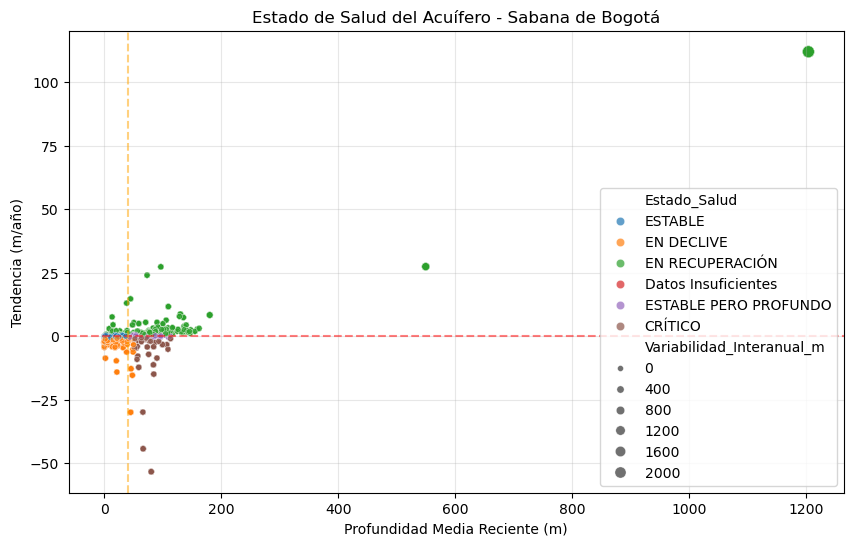

In [32]:
# Scatter plot: Tendencia vs Profundidad (lo más importante)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=FUNIAS_SABANA_COMPLETO, 
                x='Profundidad_Media_Reciente_m', 
                y='Tendencia_Lineal_m_año',
                hue='Estado_Salud',
                size='Variabilidad_Interanual_m',
                alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=40, color='orange', linestyle='--', alpha=0.5)
plt.xlabel('Profundidad Media Reciente (m)')
plt.ylabel('Tendencia (m/año)')
plt.title('Estado de Salud del Acuífero - Sabana de Bogotá')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
import geopandas as gpd

In [34]:
cundinamarca=gpd.read_file(r"C:\Users\Andres\Downloads\Municipios_de_Cundinamarca_2022\Municipios_de_Cundinamarca_2022.shp")

In [35]:
cundinamarca.drop(columns=['OBJECTID','MpCodigo','MpArea', 'MpNorma', 'MpCategor','MpAltitud', 'Restriccio', 'Depto', 'Ley617'],inplace=True)

In [36]:
cundinamarca.rename(columns={"MpNombre":"MUNICIPIO"},inplace=True)

In [37]:
from unidecode import unidecode

cundinamarca["MUNICIPIO"] = (
    cundinamarca["MUNICIPIO"]
    .fillna("")
    .astype(str)
    .map(unidecode)         # quita tildes
    .str.upper()            # convierte a mayúsculas
    .str.replace(" ", "_")  # reemplaza espacios por _
)


In [38]:
cundinamarca.MUNICIPIO.unique()

array(['CABRERA', 'VENECIA', 'SAN_BERNARDO', 'PANDI', 'ARBELAEZ',
       'GUTIERREZ', 'GUAYABETAL', 'FOSCA', 'NILO', 'RICAURTE', 'TIBACUY',
       'PASCA', 'QUETAME', 'AGUA_DE_DIOS', 'FUSAGASUGA', 'UNE',
       'GIRARDOT', 'CAQUEZA', 'NARINO', 'SILVANIA', 'CHIPAQUE', 'VIOTA',
       'SIBATE', 'GRANADA', 'UBAQUE', 'GUATAQUI', 'TOCAIMA', 'EL_COLEGIO',
       'APULO', 'SOACHA', 'ANAPOIMA', 'CHOACHI',
       'SAN_ANTONIO_DEL_TEQUENDAMA', 'JERUSALEN', 'MEDINA', 'FOMEQUE',
       'TENA', 'LA_MESA', 'MOSQUERA', 'PARATEBUENO', 'PULI', 'BOJACA',
       'CACHIPAY', 'GAMA', 'FUNZA', 'QUIPILE', 'GACHALA', 'ZIPACON',
       'LA_CALERA', 'JUNIN', 'BELTRAN', 'ANOLAIMA', 'COTA', 'MADRID',
       'UBALA', 'FACATATIVA', 'TENJO', 'CHIA', 'GUASCA', 'BITUIMA',
       'EL_ROSAL', 'GUAYABAL_DE_SIQUIMA', 'ALBAN', 'GACHETA', 'VIANI',
       'SOPO', 'SAN_JUAN_DE_RIOSECO', 'CAJICA', 'GUATAVITA', 'TABIO',
       'CHAGUANI', 'SASAIMA', 'TOCANCIPA', 'SAN_FRANCISCO', 'GACHANCIPA',
       'MANTA', 'VILLETA', 'SUBACHO

In [39]:
sabana_bogota=cundinamarca[cundinamarca["MUNICIPIO"].isin(Municipios_sabana)]

In [40]:
sabana_bogota.MUNICIPIO.unique()

array(['SIBATE', 'SOACHA', 'MOSQUERA', 'BOJACA', 'FUNZA', 'LA_CALERA',
       'COTA', 'MADRID', 'FACATATIVA', 'TENJO', 'CHIA', 'EL_ROSAL',
       'SOPO', 'CAJICA', 'GUATAVITA', 'TABIO', 'TOCANCIPA', 'GACHANCIPA',
       'SUBACHOQUE', 'SESQUILE', 'ZIPAQUIRA', 'NEMOCON', 'COGUA',
       'SUESCA', 'CHOCONTA', 'VILLAPINZON'], dtype=object)

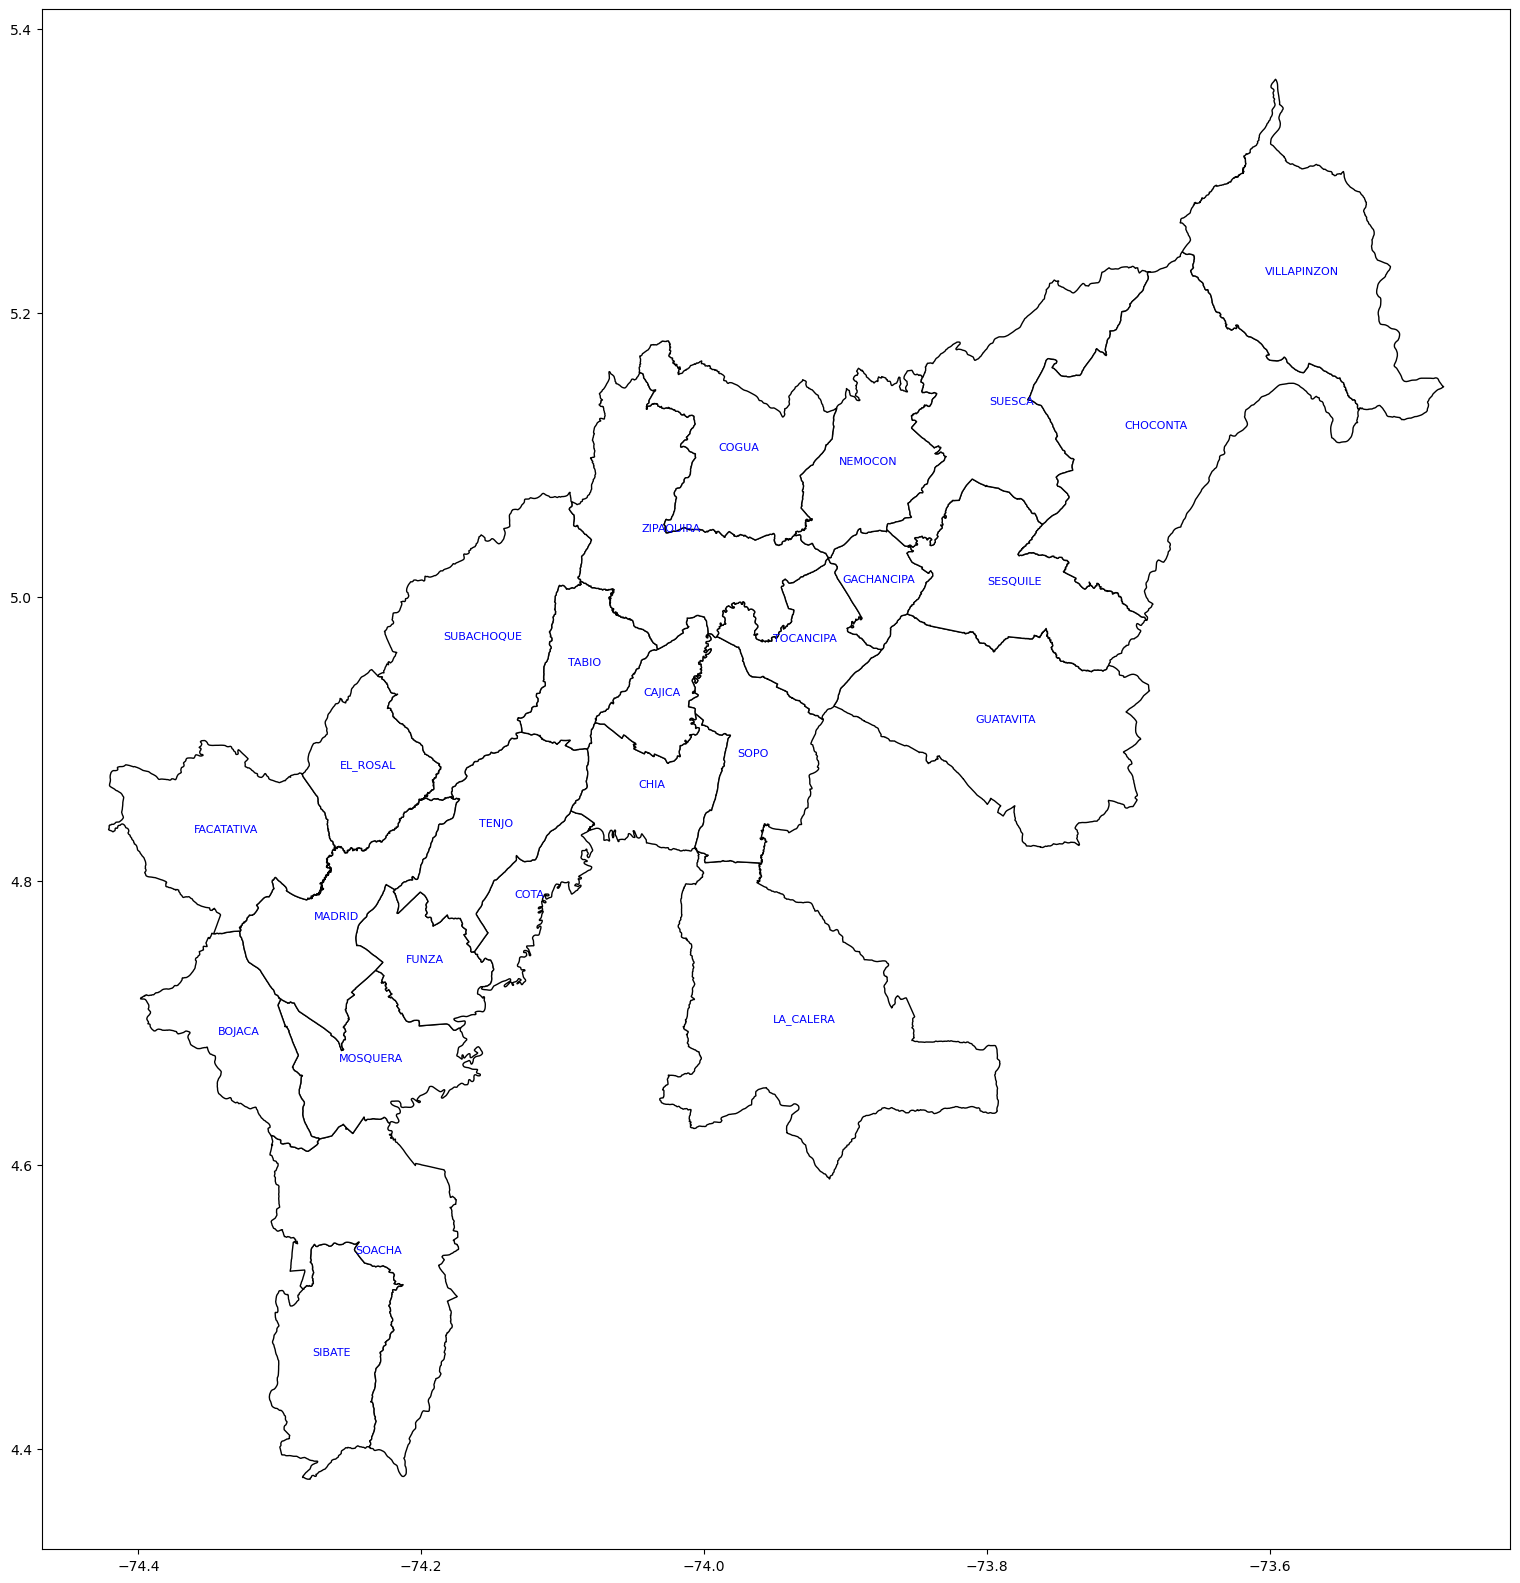

In [41]:
fig,ax=plt.subplots(figsize=(20,20))
sabana_bogota.plot(ax=ax,color="white",edgecolor="black")
for idx,row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="blue")
plt.show()

In [42]:
gdf_FUNIAS_SABANA_COMPLETA = gpd.GeoDataFrame(
    FUNIAS_SABANA_COMPLETO,
    geometry=gpd.points_from_xy(
        FUNIAS_SABANA_COMPLETO["ESTE"],
        FUNIAS_SABANA_COMPLETO["NORTE"]
    ),
    crs="EPSG:9377"
)


In [43]:
if sabana_bogota.crs != gdf_FUNIAS_SABANA_COMPLETA.crs:
    gdf_FUNIAS_SABANA_COMPLETA = gdf_FUNIAS_SABANA_COMPLETA.to_crs(sabana_bogota.crs)

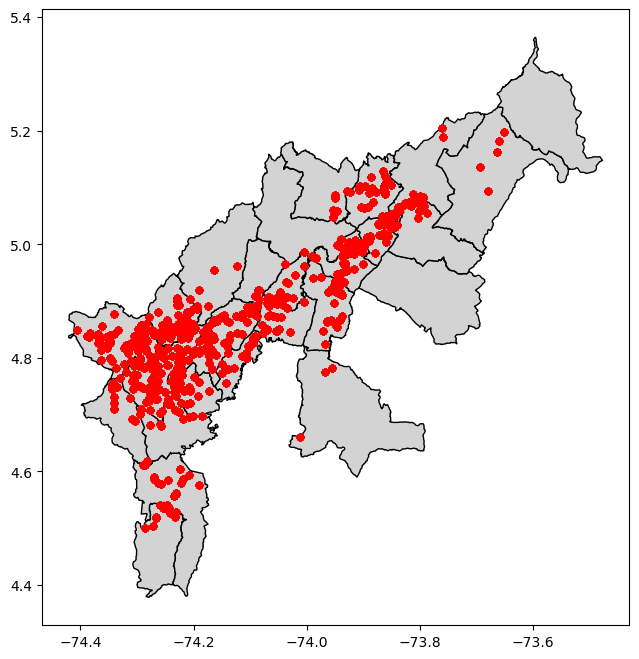

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
sabana_bogota.plot(ax=ax, color="lightgray", edgecolor="black")
gdf_FUNIAS_SABANA_COMPLETA.plot(ax=ax, color="red", markersize=20)
plt.show()

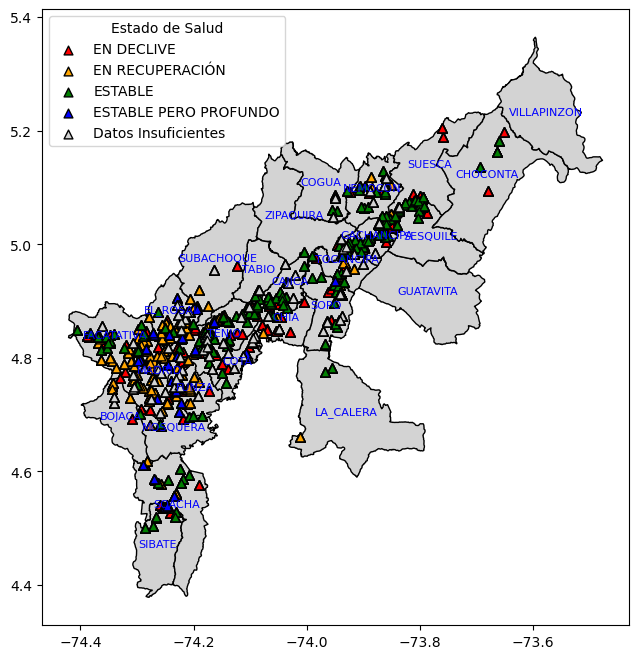

In [45]:
colores_riesgo = {
    'EN DECLIVE': 'red',
    'EN RECUPERACIÓN': 'orange',
    'ESTABLE': 'green',
    'ESTABLE PERO PROFUNDO': 'blue',
    'Datos Insuficientes': 'lightgrey'
}

fig, ax = plt.subplots(figsize=(8,8))

sabana_bogota.plot(ax=ax, color="lightgray", edgecolor="black")
for idx, row in sabana_bogota.iterrows():
    # Calcular centroide del polígono
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="blue")


for categoria, color in colores_riesgo.items():
    subset = gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["Estado_Salud"] == categoria]
    if not subset.empty:
        subset.plot(
            ax=ax,
            color=color,
            marker='^',
            label=categoria,
            markersize=40,
            edgecolor="black"
        )

plt.legend(title="Estado de Salud")
plt.show()

### INTEGRAR CON LOS DATOS DE PUNTOS DE CAPTACIÓN Y CREAR LA FUNCIÓN QUE RELACIONE ESPACIALMENTE CADA POZO CON SUS PUNTOS DE CAPTACIÓN MÁS CERCANOS EVITANDO QUE NINGUN POZO QUEDE SIN ASIGNACIONES. 

In [46]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [47]:
gdf_puntos_captacion_sabana_subterranea=gpd.read_file(r"C:\Users\Andres\Downloads\puntos_captacion_sabana_final_limpio.geojson")

In [48]:
gdf_puntos_captacion_sabana_subterranea.dtypes

IDUSUARIO                           int32
IDPREDIO                            int32
IDCONCESION                         int32
IDCAPTACION                         int32
IDUSO                               int32
MUNICIPIO                          object
OFERTA_HIDRICA_TOTAL              float64
OFERTA_DISPONIBLE                 float64
ESTADO_CAPTACION                   object
CAUDAL_CONCESIONADO               float64
CAUDAL_ASIGNADO                   float64
TIPOUSO                            object
DESCRIPCION_ACCESO                 object
NOMBREFUENTE                       object
TIPOFUENTECAPTACION                object
SUBZONA                            object
CONTINUIDAD                        object
GRADOS_LAT                          int32
MINUTOS_LAT                         int32
SEGUNDOS_LAT                      float64
GRADOS_LONG                         int32
MINUTOS_LONG                        int32
SEGUNDOS_LONG                     float64
CODIGOCIUU                        

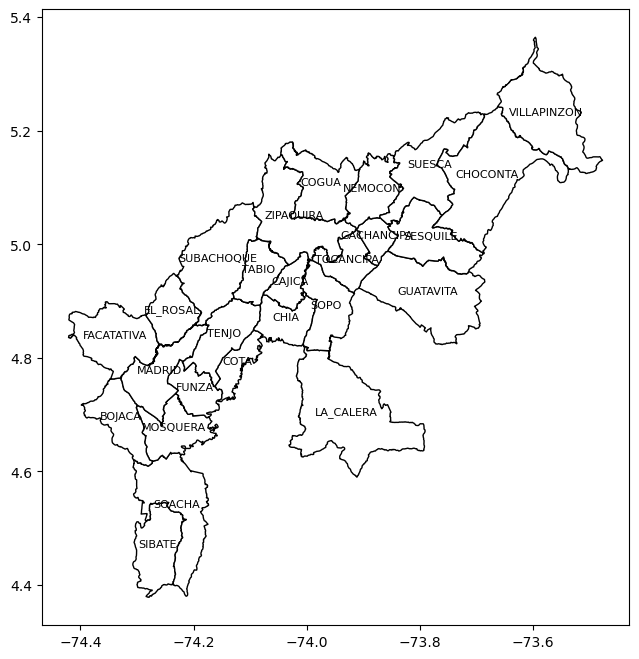

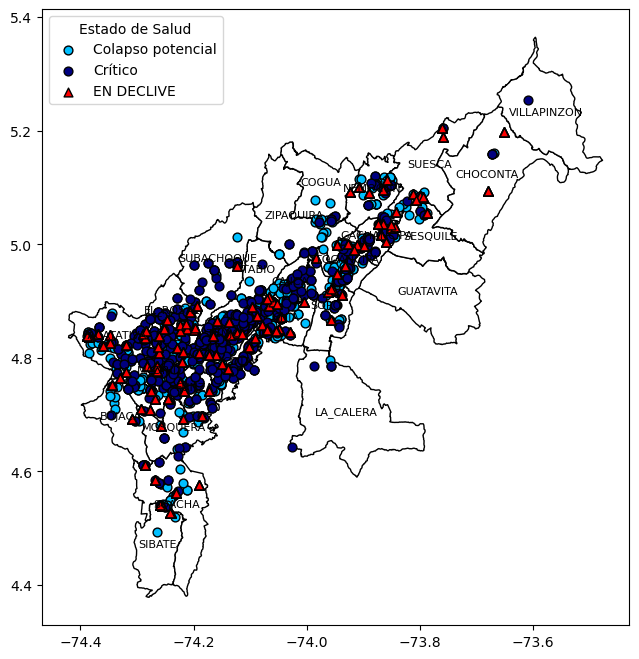

C:\Users\Andres\AppData\Local\Temp\ipykernel_7832\2162789673.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Estado de Salud")


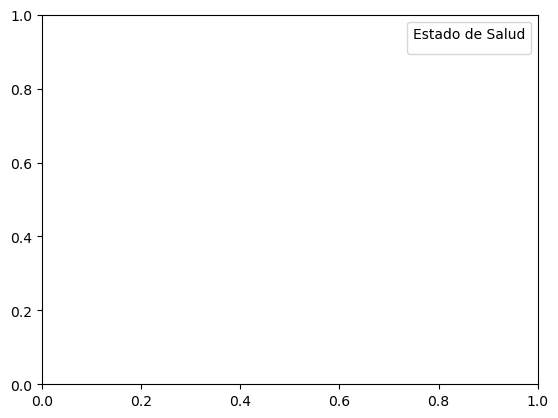

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

# Polígono base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Etiquetas con nombre de municipio en el centroide
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

# --- Puntos captación con riesgo colapso potencial o crítico ---
categorias = ["Colapso potencial", "Crítico"]
puntos_criticos_colapso = gdf_puntos_captacion_sabana_subterranea[
    gdf_puntos_captacion_sabana_subterranea["RIESGO_ASIG_DISP"].isin(categorias)
]
fig, ax = plt.subplots(figsize=(8,8))

# Polígono base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Etiquetas con nombre de municipio en el centroide
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

# --- Puntos captación con riesgo colapso potencial o crítico ---
categorias = ["Colapso potencial", "Crítico"]
puntos_criticos_colapso = gdf_puntos_captacion_sabana_subterranea[
    gdf_puntos_captacion_sabana_subterranea["RIESGO_ASIG_DISP"].isin(categorias)
]

# Colores azul diferenciados
colores = {
    "Colapso potencial": "deepskyblue",
    "Crítico": "navy"
}

for cat, color in colores.items():
    subset = puntos_criticos_colapso[puntos_criticos_colapso["RIESGO_ASIG_DISP"] == cat]
    subset.plot(
        ax=ax,
        color=color,
        label=cat,
        markersize=40,
        marker="o",
        edgecolor="black"
    )

# --- Filtrar solo "EN DECLIVE" ---
declive = gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["Estado_Salud"] == "EN DECLIVE"]

declive.plot(
    ax=ax,
    color="red",
    marker="^",
    label="EN DECLIVE",
    markersize=40,
    edgecolor="black"
)

# Leyenda
plt.legend(title="Estado de Salud")
plt.show()

# Colores azul diferenciados
colores = {
    "Colapso potencial": "deepskyblue",
    "Crítico": "navy"
}

for cat, color in colores.items():
    subset = puntos_criticos_colapso[puntos_criticos_colapso["RIESGO_ASIG_DISP"] == cat]
    subset.plot(
        ax=ax,
        color=color,
        label=cat,
        markersize=40,
        marker="o",
        edgecolor="black"
    )

# --- Filtrar solo "EN DECLIVE" ---
declive = gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["Estado_Salud"] == "EN DECLIVE"]

declive.plot(
    ax=ax,
    color="red",
    marker="^",
    label="EN DECLIVE",
    markersize=40,
    edgecolor="black"
)

# Leyenda
plt.legend(title="Estado de Salud")
plt.show()


# Creación de la función de asignación de puntos de captación al pozo de monitoreo más cercano

Probar:

integrar otros criterios adicionales a la proximidad del punto de captación respecto al pozo de monitoreo.
explorar criterios como:

1. La unidad Geologica
2. La Estructuca Geologica
3. profundidad media de los niveles piezometricos

In [50]:
from shapely.ops import nearest_points

In [51]:
# Pasar a CRS proyectado en metros (MAGNA-SIRGAS Bogotá)
gdf_puntos_captacion_sabana_subterranea = gdf_puntos_captacion_sabana_subterranea.to_crs(epsg=3116)
gdf_FUNIAS_SABANA_COMPLETA = gdf_FUNIAS_SABANA_COMPLETA.to_crs(epsg=3116)

In [52]:
def asignar_pozos_a_captaciones(gdf_captaciones, gdf_pozos, max_dist=2500):
    asignaciones = []

    for idx, cap in gdf_captaciones.iterrows():
        # 1. Filtrar por municipio
        candidatos = gdf_pozos[gdf_pozos["MUNICIPIO"] == cap["MUNICIPIO"]]

        # 2. Filtrar por unidad geológica
        if "UNIDAD_GEOLOGICA" in cap and not pd.isna(cap["UNIDAD_GEOLOGICA"]):
            candidatos = candidatos[candidatos["UNIDAD_GEOLOGICA"] == cap["UNIDAD_GEOLOGICA"]]

        # 3. Filtrar por estructura geológica
        if "ESTRUCTURA_GEOLOGICA" in cap and not pd.isna(cap["ESTRUCTURA_GEOLOGICA"]):
            candidatos = candidatos[candidatos["ESTRUCTURA_GEOLOGICA"] == cap["ESTRUCTURA_GEOLOGICA"]]

        # 4. Calcular distancias
        candidatos = candidatos.copy()
        candidatos["distancia_m"] = candidatos.geometry.distance(cap.geometry)

        # 5. Escoger el pozo más cercano dentro del rango
        candidatos = candidatos[candidatos["distancia_m"] <= max_dist]
        if not candidatos.empty:
            pozo_cercano = candidatos.sort_values("distancia_m").iloc[0]
            asignaciones.append({
                "captacion_id": cap["IDCAPTACION"],  # cambia si tu columna ID se llama distinto
                "pozo_id": pozo_cercano["CONSECUTIVO PUNTO"],
                "distancia_m": pozo_cercano["distancia_m"]
            })
        else:
            asignaciones.append({
                "captacion_id": cap["IDCAPTACION"],
                "pozo_id": None,
                "distancia_m": None
            })

    return pd.DataFrame(asignaciones)


In [53]:
asignaciones = asignar_pozos_a_captaciones(gdf_puntos_captacion_sabana_subterranea, gdf_FUNIAS_SABANA_COMPLETA, max_dist=2500)

In [54]:
asignaciones

,captacion_id,pozo_id,distancia_m
0,7027901,CAMRB0227,11.066862
1,7030913,CAMRB0210,28.699201
2,7030913,CAMRB0210,28.699201
3,7030913,CAMRB0210,28.699201
4,7031968,CAMRB0526,12.598134
...,...,...,...
1905,7038127,CAMRB0452,414.092379
1906,7038127,CAMRB0452,414.092379
1907,7038128,CAMRB0538,341.398494
1908,7038131,CAMRB0545,20.806042


In [55]:
asignaciones.pozo_id.value_counts()

pozo_id
CAMRB0250    46
CAMRB0137    31
CAMRB0075    26
CAMRB0507    24
CAMRB0249    23
             ..
CAMRB0594     1
CAMRB0575     1
CAMRB0343     1
CAMRB0668     1
CAMRB0423     1
Name: count, Length: 384, dtype: int64

# Exploramos los resultados de la función

In [56]:
asignaciones.pozo_id.nunique()

384

In [57]:
gdf_FUNIAS_SABANA_COMPLETA["CONSECUTIVO PUNTO"].nunique()

588

In [58]:
588-384

204

In [59]:
# Como resultado de la función 384 pozos se asociaron a algún punto de captación. Por otro lado, 204 pozos no se asociaron a ningún punto de captación.
# Recordemos que hay 588 pozos de monitoreo únicos.

In [60]:
print(f' La distancia minima entre pozo y punto de captación es de: {asignaciones.distancia_m.min()}')
print(f' La distancia maxima entre pozo y punto de captación es de: {asignaciones.distancia_m.max()}')
print(f' La distancia promedio entre pozo y punto de captación es de: {asignaciones.distancia_m.mean()}')
print(f' La mediana de la distancia  entre pozo y punto de captación es de: {asignaciones.distancia_m.median()}')
print(f' La moda de la distancia minima entre pozo y punto de captación es de: {asignaciones.distancia_m.mode()}')

 La distancia minima entre pozo y punto de captación es de: 1.1339244236590038
 La distancia maxima entre pozo y punto de captación es de: 2493.2637396625973
 La distancia promedio entre pozo y punto de captación es de: 557.5644649718884
 La mediana de la distancia  entre pozo y punto de captación es de: 471.8933271079498
 La moda de la distancia minima entre pozo y punto de captación es de: 0    434.393843
Name: distancia_m, dtype: float64


In [61]:
lista_id_asociados_pozo_mas_asignado=asignaciones[asignaciones["pozo_id"]=="CAMRB0250"]["captacion_id"].unique().tolist()
print(lista_id_asociados_pozo_mas_asignado)

[7032766, 7032921, 7032942, 7033197, 7033218, 7033305, 7033955, 7034007, 7034397, 7034398, 7034417, 7034646, 7034647, 7034652, 7034685, 7034843, 7034846, 7034855, 7034867, 7034882, 7035116, 7036241, 7036242, 7036243, 7037449, 7037450, 7037709]


# Ojo volvemos a cambiar el sistema de referencia

In [62]:
# Asegurar que todos los GeoDataFrames queden en el CRS de sabana_bogota
if gdf_puntos_captacion_sabana_subterranea.crs != sabana_bogota.crs:
    gdf_puntos_captacion_sabana_subterranea = gdf_puntos_captacion_sabana_subterranea.to_crs(sabana_bogota.crs)

if gdf_FUNIAS_SABANA_COMPLETA.crs != sabana_bogota.crs:
    gdf_FUNIAS_SABANA_COMPLETA = gdf_FUNIAS_SABANA_COMPLETA.to_crs(sabana_bogota.crs)


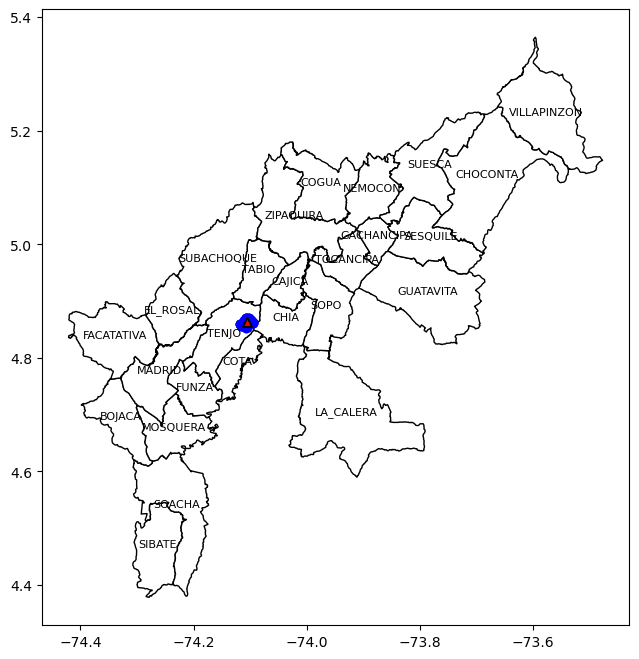

In [63]:
fig, ax = plt.subplots(figsize=(8,8))

# Polígono base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Etiquetas con nombre de municipio en el centroide
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

# filtro puntos de captación asociados al pozo CAMRB0250
puntos_captacion_asociados_pozoCAMRB0250=gdf_puntos_captacion_sabana_subterranea[gdf_puntos_captacion_sabana_subterranea["IDCAPTACION"].isin(lista_id_asociados_pozo_mas_asignado)]
puntos_captacion_asociados_pozoCAMRB0250.plot(ax=ax, color="blue")

#filtro pozo CAMRB0250
pozo_CAMRB0250=gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["CONSECUTIVO PUNTO"]=="CAMRB0250"]
pozo_CAMRB0250.plot(ax=ax, color="red",marker="^",edgecolor="black")
plt.show()

In [64]:
gdf_puntos_captacion_sabana_subterranea[
    gdf_puntos_captacion_sabana_subterranea["IDCAPTACION"].isin(lista_id_asociados_pozo_mas_asignado)
][["OFERTA_DISPONIBLE", "CAUDAL_ASIGNADO","TIPOUSO"]]


,OFERTA_DISPONIBLE,CAUDAL_ASIGNADO,TIPOUSO
117,0.000225,0.0100,Doméstico
118,0.000225,0.0100,Pecuario
340,0.000300,0.0600,Agricola
341,0.000300,0.0020,Pecuario
365,0.000255,0.2400,Agricola
366,0.000255,0.0060,Doméstico
367,0.000255,0.0050,Pecuario
711,0.000525,0.0200,Pecuario
740,0.000750,0.1800,Agricola
741,0.000750,0.0040,Doméstico


In [65]:
gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["CONSECUTIVO PUNTO"]=="CAMRB0250"]

,CONSECUTIVO PUNTO,NOMBRE DEL PROYECTO,MUNICIPIO,CUENCA HIDROGRÁFICA,NORTE,ESTE,ESTRUCTURA GEOLOGICA,UNIDAD GEOLOGICA,VALOR_NIVEL_ESTATICO,FECHA,Tendencia_Lineal_m_año,Profundidad_Media_Reciente_m,Variabilidad_Interanual_m,Completitud_Serie_%,Total_Mediciones,Primera_Medicion,Ultima_Medicion,Rango_Anios,Estado_Salud,geometry
183,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,16.10,1998-12-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
771,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,16.07,1999-02-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
1359,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,16.06,2000-12-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
1947,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,16.06,2001-02-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
2535,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,19.70,2002-01-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
3123,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,NaN,2002-07-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
3711,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,NaN,2003-07-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
4299,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,17.17,2005-12-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
4887,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,18.04,2006-01-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)
5475,CAMRB0250,Contrato de Consultoría CAR-CM- 3083-2024,TENJO,Alta Río Bogotá,2095529,4877366,Sinclinal de Rio Frio,Depósitos cuaternarios,15.12,2008-01-01,-0.03619,16.125,4.747258,70.37037,19,1998-12-01,2025-01-01,26.086242,ESTABLE,POINT (-74.106 4.8637)


In [66]:
gdf_puntos_captacion_sabana_subterranea.columns

Index(['IDUSUARIO', 'IDPREDIO', 'IDCONCESION', 'IDCAPTACION', 'IDUSO',
       'MUNICIPIO', 'OFERTA_HIDRICA_TOTAL', 'OFERTA_DISPONIBLE',
       'ESTADO_CAPTACION', 'CAUDAL_CONCESIONADO', 'CAUDAL_ASIGNADO', 'TIPOUSO',
       'DESCRIPCION_ACCESO', 'NOMBREFUENTE', 'TIPOFUENTECAPTACION', 'SUBZONA',
       'CONTINUIDAD', 'GRADOS_LAT', 'MINUTOS_LAT', 'SEGUNDOS_LAT',
       'GRADOS_LONG', 'MINUTOS_LONG', 'SEGUNDOS_LONG', 'CODIGOCIUU',
       'DESCRIPCIONCIUU', 'FECHA_INICIO', 'FECHA_FIN', 'LAT_DD_calc',
       'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE', 'RATIO_CONCESIONADO_TOTAL',
       'RATIO_CONCESIONADO_DISPONIBLE', 'RATIO_ASIGNADO_CONCESIONADO',
       'RIESGO_ASIG_DISP', 'REGION', 'geometry'],
      dtype='object')

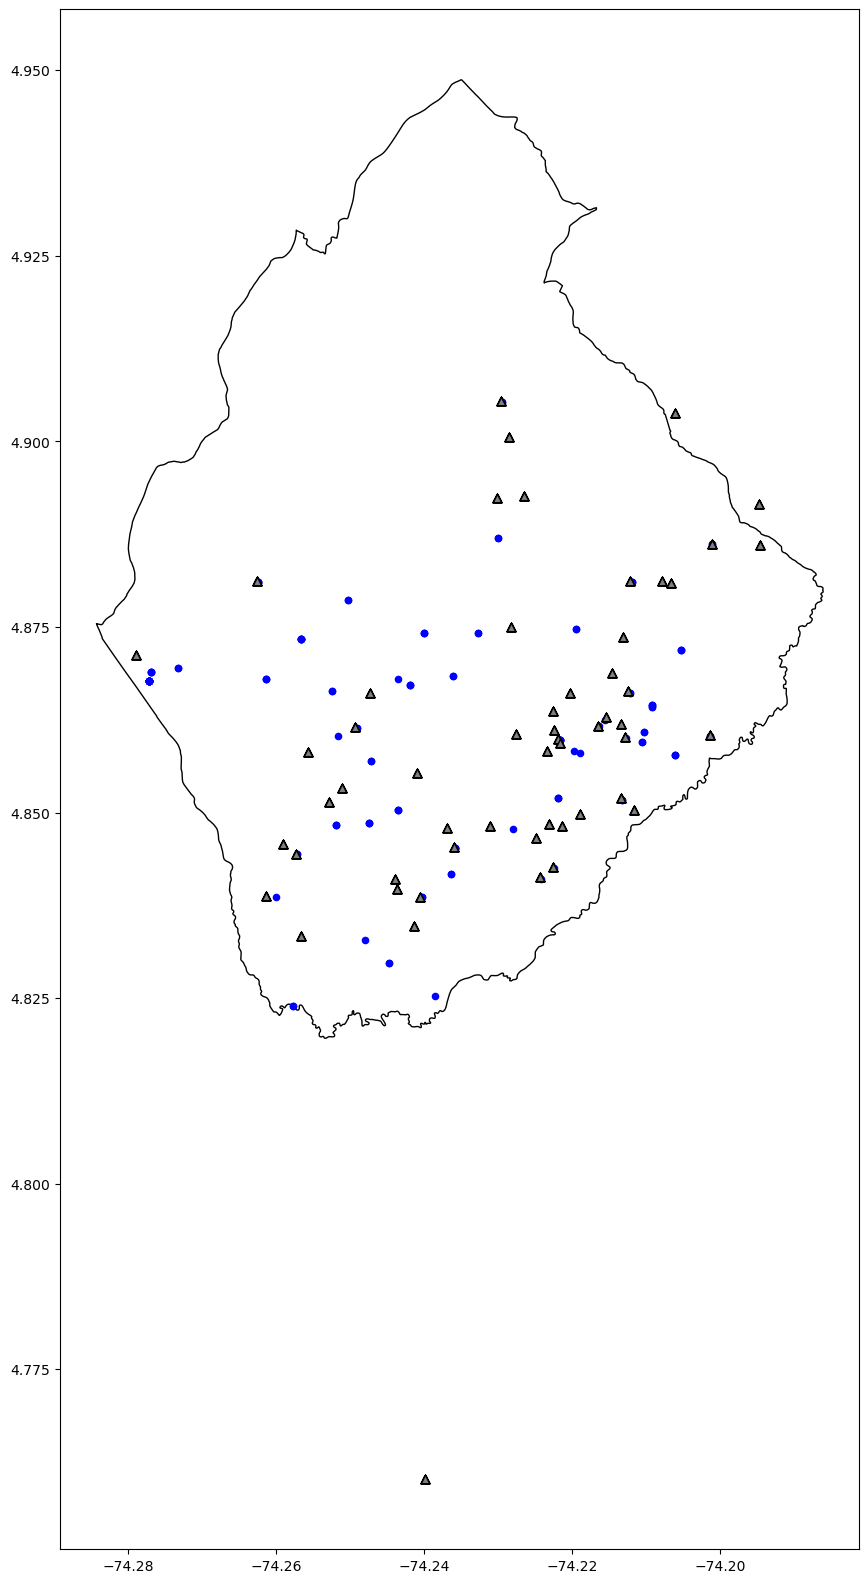

In [67]:
fig, ax=plt.subplots(figsize=(20,20))

# Mapa El Rosal
mapa_rosal=sabana_bogota[sabana_bogota["MUNICIPIO"]=="EL_ROSAL"]
mapa_rosal.plot(ax=ax, color="white",edgecolor="black")

# Puntos de captación de aguas subterraneas ubicadas en Mosquera (84 puntos de captación únicos).
puntos_captacion_rosal = gdf_puntos_captacion_sabana_subterranea[
    gdf_puntos_captacion_sabana_subterranea["MUNICIPIO"] == "EL_ROSAL"
]
puntos_captacion_rosal.plot(ax=ax, color="blue", markersize=20, label="Captaciones")

# Pozos de monitoreo localizados en Mosquera (pozos de la CAR-55 pozos)
pozos_en_rosal=gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["MUNICIPIO"]=="EL_ROSAL"]
pozos_en_rosal.plot(ax=ax, color="grey", marker='^',edgecolor="black")



plt.show()

# IDENTIFICAR QUE POZOS NO TUVIERON ASIGNACIÓN DE PUNTOS DE CAPTACIÓN 

In [68]:
lista_todos_pozos_monitoreo=gdf_FUNIAS_SABANA_COMPLETA["CONSECUTIVO PUNTO"].unique().tolist()
len(lista_todos_pozos_monitoreo)

588

In [69]:
lista_pozos_asignados_puntos_monitoreo=asignaciones.pozo_id.unique().tolist()
len(lista_pozos_asignados_puntos_monitoreo)

385

In [70]:
# operacion diferencias.
lista_pozos_sin_asignacion_puntos_monitoreo=set(lista_todos_pozos_monitoreo)-set(lista_pozos_asignados_puntos_monitoreo)
len(lista_pozos_sin_asignacion_puntos_monitoreo)

204

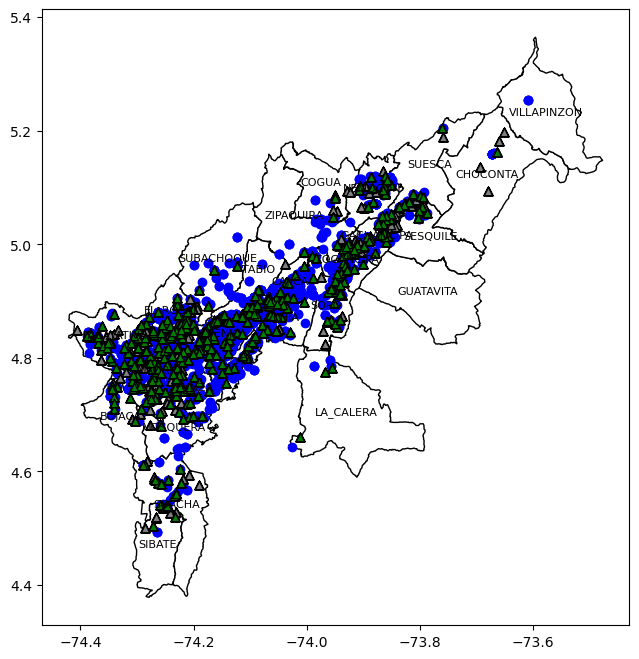

In [71]:
fig, ax = plt.subplots(figsize=(8,8))

# Polígono base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Etiquetas con nombre de municipio en el centroide
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

# filtro puntos de captación 
gdf_puntos_captacion_sabana_subterranea.plot(ax=ax,color="blue")

#filtro pozos sin asignación
pozos_sin_asignacion=gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["CONSECUTIVO PUNTO"].isin(lista_pozos_sin_asignacion_puntos_monitoreo)]
pozos_sin_asignacion.plot(ax=ax, color="grey",marker="^",edgecolor="black")

#filtro pozos con asignación
pozos_con_asignacion=gdf_FUNIAS_SABANA_COMPLETA[gdf_FUNIAS_SABANA_COMPLETA["CONSECUTIVO PUNTO"].isin(lista_pozos_asignados_puntos_monitoreo)]
pozos_con_asignacion.plot(ax=ax, color="green",marker="^",edgecolor="black")
plt.show()

# MERGE DE INTEGRACIÓN DE LA TABLA RESULTANTE DE LA APLICACIÓN DE LA FUNCIÓN  DE ASOCIACIÓN POZOS-PUNTOS DE CAPTACIÓN CON LA TABLA DE PUNTOS DE CAPTACIÓN

In [72]:
captaciones_enriquecidas = (
    asignaciones
    .merge(gdf_puntos_captacion_sabana_subterranea, left_on="captacion_id", right_on="IDCAPTACION")
    .merge(gdf_FUNIAS_SABANA_COMPLETA, left_on="pozo_id", right_on="CONSECUTIVO PUNTO", how="left")
)

In [73]:
captaciones_enriquecidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67336 entries, 0 to 67335
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   captacion_id                   67336 non-null  int64         
 1   pozo_id                        67051 non-null  object        
 2   distancia_m                    67051 non-null  float64       
 3   IDUSUARIO                      67336 non-null  int32         
 4   IDPREDIO                       67336 non-null  int32         
 5   IDCONCESION                    67336 non-null  int32         
 6   IDCAPTACION                    67336 non-null  int32         
 7   IDUSO                          67336 non-null  int32         
 8   MUNICIPIO_x                    67336 non-null  object        
 9   OFERTA_HIDRICA_TOTAL           67326 non-null  float64       
 10  OFERTA_DISPONIBLE              67326 non-null  float64       
 11  ESTADO_CAPTACIO

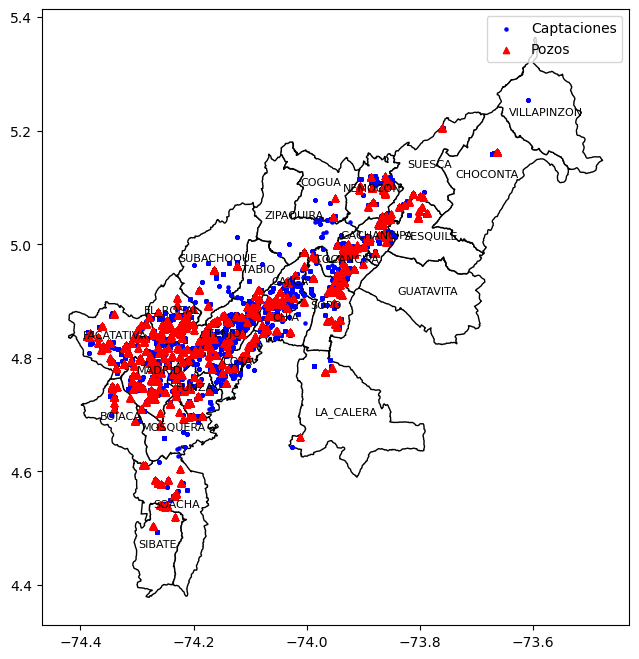

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))

# Polígono base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Etiquetas con nombre de municipio en el centroide
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

# Puntos de captación (geometry activa)
captaciones_enriquecidas.set_geometry("geometry_x").plot(ax=ax, color="blue", markersize=5, label="Captaciones")

# Puntos de pozo
captaciones_enriquecidas.set_geometry("geometry_y").plot(ax=ax, color="red", markersize=20, marker="^", label="Pozos")

plt.legend()
plt.show()

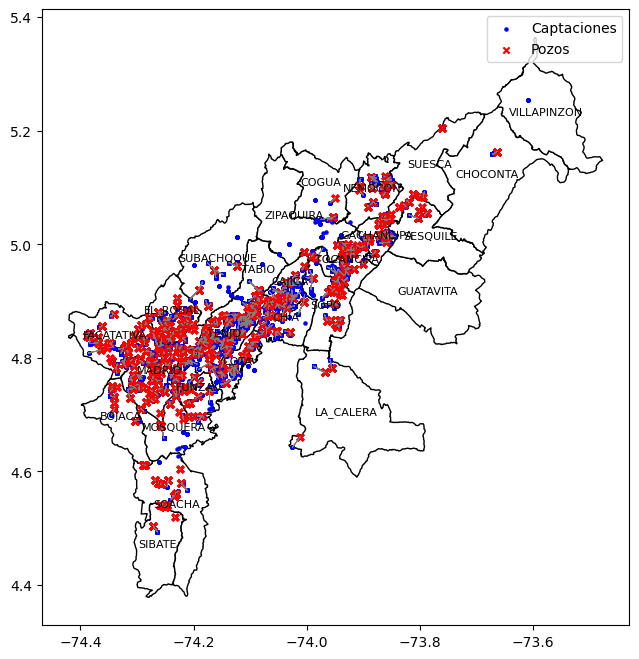

In [75]:
import shapely.geometry as geom

fig, ax = plt.subplots(figsize=(8, 8))

# Polígono base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Etiquetas con nombre de municipio en el centroide
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")


# Graficar captaciones y pozos
captaciones_enriquecidas.set_geometry("geometry_x").plot(ax=ax, color="blue", markersize=5, label="Captaciones")
captaciones_enriquecidas.set_geometry("geometry_y").plot(ax=ax, color="red", markersize=20, marker="x", label="Pozos")

# Dibujar líneas de conexión
for _, row in captaciones_enriquecidas.dropna(subset=["geometry_y"]).iterrows():
    line = geom.LineString([row["geometry_x"], row["geometry_y"]])
    ax.plot(*line.xy, color="gray", linewidth=0.5, alpha=0.5)

plt.legend(loc="best")
plt.show()


In [76]:
captaciones_enriquecidas[captaciones_enriquecidas.distancia_m.isnull()]["IDCAPTACION"].nunique()

66

In [77]:
captaciones_enriquecidas.IDCAPTACION.nunique()

1129

In [78]:
1129-66

1063

# Conclusiones de la asociación pozos monitoreo (CAR) - puntos de captación (Usuarios aguas subterraneas)

1. Hubo puntos de captación que no quedaron vinculados a ningún pozo de monitoreo. De acuerdo con el mapa esta situación se explica por el parametro de distancia que fue definido en 2500 mts (2.5 km)
2. Hubo pozos de monitoreo que no quedaron vinculados a ningún punto de captación, desde el punto de vista de negocio (hidrogeologia esto puede permitir comparaciones entre zonas con extracción de agua subterranea y en los que no hay derechos de concesión asignados)
3. Hay que realizar la limpieza del geodataframe resultante, este seria la base para el entrenamiento del modelo.

In [79]:
captaciones_enriquecidas.columns

Index(['captacion_id', 'pozo_id', 'distancia_m', 'IDUSUARIO', 'IDPREDIO',
       'IDCONCESION', 'IDCAPTACION', 'IDUSO', 'MUNICIPIO_x',
       'OFERTA_HIDRICA_TOTAL', 'OFERTA_DISPONIBLE', 'ESTADO_CAPTACION',
       'CAUDAL_CONCESIONADO', 'CAUDAL_ASIGNADO', 'TIPOUSO',
       'DESCRIPCION_ACCESO', 'NOMBREFUENTE', 'TIPOFUENTECAPTACION', 'SUBZONA',
       'CONTINUIDAD', 'GRADOS_LAT', 'MINUTOS_LAT', 'SEGUNDOS_LAT',
       'GRADOS_LONG', 'MINUTOS_LONG', 'SEGUNDOS_LONG', 'CODIGOCIUU',
       'DESCRIPCIONCIUU', 'FECHA_INICIO', 'FECHA_FIN', 'LAT_DD_calc',
       'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE', 'RATIO_CONCESIONADO_TOTAL',
       'RATIO_CONCESIONADO_DISPONIBLE', 'RATIO_ASIGNADO_CONCESIONADO',
       'RIESGO_ASIG_DISP', 'REGION', 'geometry_x', 'CONSECUTIVO PUNTO',
       'NOMBRE DEL PROYECTO', 'MUNICIPIO_y', 'CUENCA HIDROGRÁFICA', 'NORTE',
       'ESTE', 'ESTRUCTURA GEOLOGICA', 'UNIDAD GEOLOGICA',
       'VALOR_NIVEL_ESTATICO', 'FECHA', 'Tendencia_Lineal_m_año',
       'Profundidad_Med

In [80]:
captaciones_enriquecidas.drop(columns=["captacion_id","NOMBRE DEL PROYECTO",],inplace=True)

In [81]:
captaciones_enriquecidas.rename(columns={"pozo_id":"POZO_ASIGNADO_AL_PUNTO","distancia_m":"DISTANCIA_M_AL_POZO_ASIGNADO",
                                         "MUNICIPIO_x":"MUNICIPIO_PUNTO_CAPTACION","geometry_x":"GEOMETRIA_PUNTO_CAPTACION",
                                         "CONSECUTIVO PUNTO":"ID_POZO_MONITOREO","MUNICIPIO_y":"MUNICIPIO_POZO_MONITOREO",
                                         "CUENCA HIDROGRÁFICA":"CUENCA_HIDROGRAFICA","ESTRUCTURA GEOLOGICA":"ESTRUCTURA_GEOLOGICA",
                                         "FECHA":"FECHA_MEDICION_NIVEL_ESTATICO","Tendencia_Lineal_m_año":"TENDENCIA_LINEAL_M_AÑO",
                                         "Profundidad_Media_Reciente_m":"PROFUNDIDAD_MEDIA_RECIENTE_M","Variabilidad_Interanual_m":"VARIABILIDAD_INTERANUAL_M",
                                         "Completitud_Serie_%":"COMPLETITUD_SERIE","Total_Mediciones":"TOTAL_MEDICIONES","Primera_Medicion":"PRIMERA_MEDICION",
                                         "Ultima_Medicion":"ULTIMA_MEDICION","Rango_Anios":"RANGO_ANIOS","Estado_Salud":"ESTADO_SALUD","geometry_y":"GEOMETRIA_POZOS"},
                                inplace=True)

In [82]:
captaciones_enriquecidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67336 entries, 0 to 67335
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   POZO_ASIGNADO_AL_PUNTO         67051 non-null  object        
 1   DISTANCIA_M_AL_POZO_ASIGNADO   67051 non-null  float64       
 2   IDUSUARIO                      67336 non-null  int32         
 3   IDPREDIO                       67336 non-null  int32         
 4   IDCONCESION                    67336 non-null  int32         
 5   IDCAPTACION                    67336 non-null  int32         
 6   IDUSO                          67336 non-null  int32         
 7   MUNICIPIO_PUNTO_CAPTACION      67336 non-null  object        
 8   OFERTA_HIDRICA_TOTAL           67326 non-null  float64       
 9   OFERTA_DISPONIBLE              67326 non-null  float64       
 10  ESTADO_CAPTACION               67336 non-null  object        
 11  CAUDAL_CONCESIO

In [84]:
gdf = gpd.GeoDataFrame(captaciones_enriquecidas, geometry="GEOMETRIA_PUNTO_CAPTACION", crs="EPSG:4326")

# Guardar en parquet (mantiene ambas geometrías)
gdf.to_parquet("captaciones_final.parquet")


